# Solving the California Housing Prices Prediction problem using:
## 1. Linear Regression
## 2. Lasso Regression
## 3. Ridge Regression
## 4. ElasticNet Regression
## 5. Support Vector Regressor (SVR)
## 6. Nearest Nieghbors regression
## 7. Decision trees
## 8. SGD Regressor
## 9. Neural Network


In [1]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Reading the dataset (California Housing Prices)

In [2]:
housing_dataset = pd.read_csv('../input/california-housing-prices/housing.csv')

In [3]:
# Showing the first 5 columns 
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Showing random 5 samples
housing_dataset.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2168,-119.87,36.79,8.0,2875.0,548.0,1718.0,551.0,3.6522,80200.0,INLAND
1582,-122.00,37.86,18.0,8953.0,1074.0,3011.0,993.0,10.7372,500001.0,<1H OCEAN
12520,-121.47,38.55,48.0,1091.0,403.0,926.0,336.0,1.1458,65400.0,INLAND
15147,-116.94,32.87,24.0,2824.0,441.0,1480.0,471.0,5.2614,177200.0,<1H OCEAN
1287,-121.84,38.02,46.0,66.0,22.0,37.0,21.0,0.5360,87500.0,INLAND


In [5]:
# the shape of the data
housing_dataset.shape

(20640, 10)

In [6]:
housing_dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# drop the missing data
housing_dataset = housing_dataset.dropna()

# the shape after dropping the missing data
housing_dataset.shape

(20433, 10)

In [8]:
housing_dataset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
# Exporing the categorical data
housing_dataset['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
# Converting categorical values to numeric values using one-hot encoding
housing_dataset = pd.get_dummies(housing_dataset, columns= ['ocean_proximity'])

# Another techinque:
'''
ocean_proximity = ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
label_encoding = preprocessing.LabelEncoder()
label_encoding = label_encoding.fit(ocean_proximity)
housing_dataset['ocean_proximity'] = label_encoding.transform(housing_dataset['ocean_proximity'])
label_encoding.classes_
'''

# Showing the data after Converting categorical values to numeric values
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [11]:
# Original data frame had 10 columns, we now have 14 columns
housing_dataset.shape

(20433, 14)

In [12]:
# Showing the correlation between data
housing_dataset_correlation = housing_dataset.corr()
housing_dataset_correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
ocean_proximity_<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


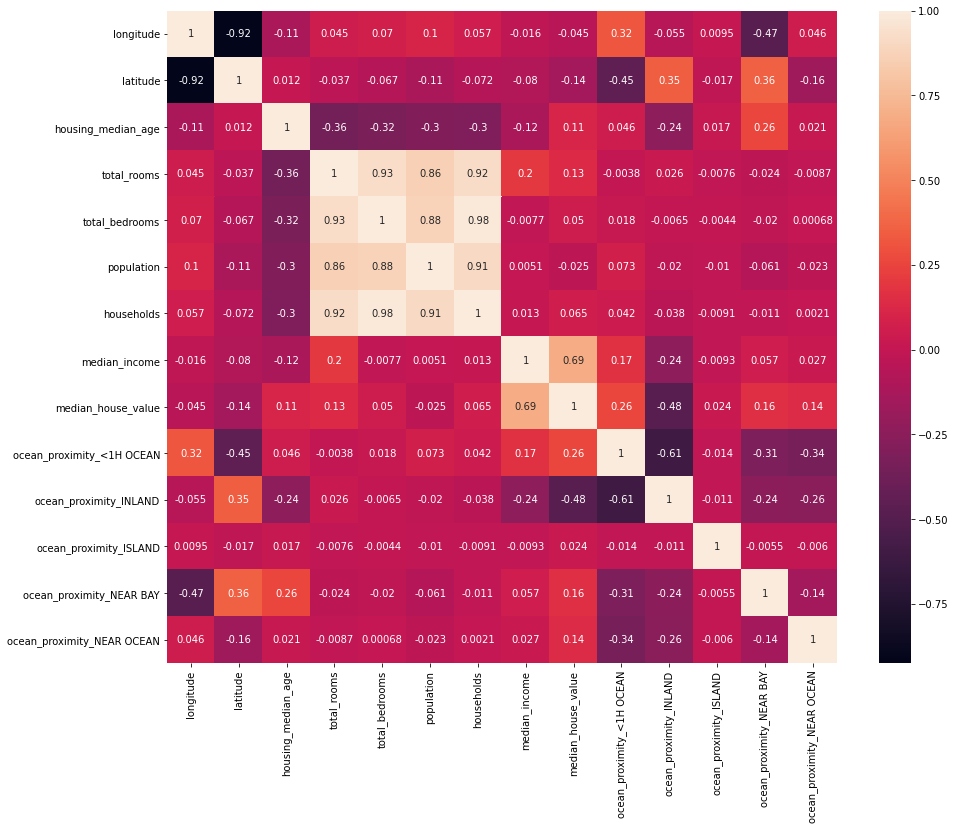

In [13]:
# housing dataset correlation in heat map
plt.figure(figsize=(15,12))
sns.heatmap(housing_dataset_correlation, annot = True)

In [14]:
# Extracting the data
X = housing_dataset.drop('median_house_value', axis = 1)  # Features
Y = housing_dataset['median_house_value']                 # Target

In [15]:
# Splitting the data into traing and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=45)

# 1. Using Linear Regression

In [16]:
linear_regressor = LinearRegression(normalize = True, fit_intercept = False, copy_X = True).fit(x_train, y_train)
# Normailzation scales all numeric features to be between 0 and 1. 
# Having features in the same scale can vastly improve tne performance of your ML model

In [17]:
print("Training score : ", linear_regressor.score(x_train, y_train))
# R-Square is a measure of how well our linear mogel captures the underlying variation in our training data

Training score :  0.6480944739155928


In [18]:
y_pred = linear_regressor.predict(x_test)

print("testing score : ", r2_score(y_test, y_pred))

testing score :  0.63681675459899


In [19]:
linear_regressor.intercept_ , linear_regressor.coef_

(0.0,
 array([-2.75922701e+04, -2.60858768e+04,  1.07513510e+03, -6.11705111e+00,
         9.96010820e+01, -4.36827919e+01,  6.53233737e+01,  3.94080582e+04,
        -2.34126629e+06, -2.37993012e+06, -2.18990957e+06, -2.34668968e+06,
        -2.33668398e+06]))

In [20]:
# Hyper-Parameters Tuning
'''
linear_regressor_parameter = {'normalize': [True, False], 'fit_intercept': [True, False]}
linear_regressor_grid_search = GridSearchCV(LinearRegression(), linear_regressor_parameter, cv = 2)
linear_regressor_grid_search.fit(X, Y)
print('The best score',linear_regressor_grid_search.best_score_)
print('The best parameters',linear_regressor_grid_search.best_params_)
'''

# The result:

# The best parameters {'fit_intercept': False, 'normalize': True}

"\nlinear_regressor_parameter = {'normalize': [True, False], 'fit_intercept': [True, False]}\nlinear_regressor_grid_search = GridSearchCV(LinearRegression(), linear_regressor_parameter, cv = 2)\nlinear_regressor_grid_search.fit(X, Y)\nprint('The best score',linear_regressor_grid_search.best_score_)\nprint('The best parameters',linear_regressor_grid_search.best_params_)\n"

# 2. Using Lasso Regression

In [21]:
lasso_regressor = Lasso(alpha = 1, fit_intercept= True, normalize= False, max_iter = 20000).fit(x_train, y_train)

In [22]:
print("Training score : ", lasso_regressor.score(x_train, y_train))
# R-Square is a measure of how well our linear mogel captures the underlying variation in our training data

Training score :  0.6480942268356988


In [23]:
y_pred = lasso_regressor.predict(x_test)
print("testing score : ", r2_score(y_test, y_pred))

testing score :  0.6368175699236837


In [24]:
lasso_regressor.intercept_ , lasso_regressor.coef_ , lasso_regressor. n_iter_

(-2341191.569059495,
 array([-2.75921451e+04, -2.60875641e+04,  1.07517725e+03, -6.11693077e+00,
         9.96133966e+01, -4.36835091e+01,  6.53099049e+01,  3.94076316e+04,
         0.00000000e+00, -3.86575692e+04,  1.48082091e+05, -5.40910353e+03,
         4.57459810e+03]),
 3202)

In [25]:
# hyper-Parameters Tuning
'''
lasso_regressor_parameter = {'alpha': [0.2,0.4,0.6,0.8,1], 'normalize': [True, False], 'fit_intercept': [True, False]}
lasso_regressor_grid_search = GridSearchCV(Lasso(max_iter = 400000), lasso_regressor_parameter, cv = 2)
lasso_regressor_grid_search.fit(X, Y)
print('The best score',lasso_regressor_grid_search.best_score_)
print('The best parameters',lasso_regressor_grid_search.best_params_)
'''

# The result:

# The best parameters {'alpha': 1, 'fit_intercept': True, 'normalize': False}

"\nlasso_regressor_parameter = {'alpha': [0.2,0.4,0.6,0.8,1], 'normalize': [True, False], 'fit_intercept': [True, False]}\nlasso_regressor_grid_search = GridSearchCV(Lasso(max_iter = 400000), lasso_regressor_parameter, cv = 2)\nlasso_regressor_grid_search.fit(X, Y)\nprint('The best score',lasso_regressor_grid_search.best_score_)\nprint('The best parameters',lasso_regressor_grid_search.best_params_)\n"

# 3. Using Ridge Regression

In [26]:
ridge_regressor = Ridge(alpha = 0.4, fit_intercept= True, normalize= False, max_iter = 20000).fit(x_train, y_train)

In [27]:
print("Training score : ", ridge_regressor.score(x_train, y_train))
# R-Square is a measure of how well our linear mogel captures the underlying variation in our training data

Training score :  0.6480923150649922


In [28]:
y_pred = ridge_regressor.predict(x_test)
print("testing score : ", r2_score(y_test, y_pred))

testing score :  0.6368137780263742


In [29]:
ridge_regressor.intercept_ , ridge_regressor.coef_ , ridge_regressor. n_iter_

(-2321630.9811814525,
 array([-2.76026039e+04, -2.60983253e+04,  1.07536014e+03, -6.11644018e+00,
         9.96537546e+01, -4.36847428e+01,  6.52650866e+01,  3.94069193e+04,
        -2.04311787e+04, -5.90755751e+04,  1.21205112e+05, -2.58475205e+04,
        -1.58508378e+04]),
 None)

In [30]:
# hyper-Parameters Tuning
'''
ridge_regressor_parameter = {'alpha': [0.2,0.4,0.6,0.8,1], 'normalize': [True, False], 'fit_intercept': [True, False]}
ridge_regressor_grid_search = GridSearchCV(Ridge(max_iter = 400000), ridge_regressor_parameter, cv = 2)
ridge_regressor_grid_search.fit(X, Y)
print('The best score',ridge_regressor_grid_search.best_score_)
print('The best parameters',ridge_regressor_grid_search.best_params_)
'''

# The result:

# The best parameters {'alpha': 0.4, 'fit_intercept': True, 'normalize': False}

"\nridge_regressor_parameter = {'alpha': [0.2,0.4,0.6,0.8,1], 'normalize': [True, False], 'fit_intercept': [True, False]}\nridge_regressor_grid_search = GridSearchCV(Ridge(max_iter = 400000), ridge_regressor_parameter, cv = 2)\nridge_regressor_grid_search.fit(X, Y)\nprint('The best score',ridge_regressor_grid_search.best_score_)\nprint('The best parameters',ridge_regressor_grid_search.best_params_)\n"

# 4. Using ElasticNet Regression

In [31]:
elastic_regressor = ElasticNet(alpha = 1, l1_ratio = 1, normalize = False, fit_intercept= True, max_iter = 20000).fit(x_train, y_train)

In [32]:
print("Training score : ", elastic_regressor.score(x_train, y_train))
# R-Square is a measure of how well our linear mogel captures the underlying variation in our training data

Training score :  0.6480942268356988


In [33]:
y_pred = elastic_regressor.predict(x_test)
print("testing score : ", r2_score(y_test, y_pred))

testing score :  0.6368175699236837


In [34]:
elastic_regressor.intercept_ , elastic_regressor.coef_ , elastic_regressor. n_iter_

(-2341191.569059495,
 array([-2.75921451e+04, -2.60875641e+04,  1.07517725e+03, -6.11693077e+00,
         9.96133966e+01, -4.36835091e+01,  6.53099049e+01,  3.94076316e+04,
         0.00000000e+00, -3.86575692e+04,  1.48082091e+05, -5.40910353e+03,
         4.57459810e+03]),
 3202)

In [35]:
# hyper-Parameters Tuning
'''
elastic_regressor_parameter = {'alpha': [0.2,0.4,0.6,0.8,1], 'l1_ratio': [0,0.2,0.5,0.8,1] , 'normalize': [True, False], 'fit_intercept': [True, False]}
elastic_regressor_grid_search = GridSearchCV(ElasticNet(max_iter = 400000), elastic_regressor_parameter, cv = 2)
elastic_regressor_grid_search.fit(X, Y)
print('The best score',elastic_regressor_grid_search.best_score_)
print('The best parameters',elastic_regressor_grid_search.best_params_)
'''

# The result:

# The best parameters {'alpha': 1, 'fit_intercept': True, 'l1_ratio': 1, 'normalize': False}

"\nelastic_regressor_parameter = {'alpha': [0.2,0.4,0.6,0.8,1], 'l1_ratio': [0,0.2,0.5,0.8,1] , 'normalize': [True, False], 'fit_intercept': [True, False]}\nelastic_regressor_grid_search = GridSearchCV(ElasticNet(max_iter = 400000), elastic_regressor_parameter, cv = 2)\nelastic_regressor_grid_search.fit(X, Y)\nprint('The best score',elastic_regressor_grid_search.best_score_)\nprint('The best parameters',elastic_regressor_grid_search.best_params_)\n"

# 5. Using Support Vector Regressor (SVR)

In [36]:
# SVR tries to fit as many points as possiple into a margine surrounding the best fit line
svr_regressor = SVR(kernel='linear', epsilon = 0.2, C = 1).fit(x_train, y_train)

In [37]:
print("Training score : ", svr_regressor.score(x_train, y_train))
# R-Square is a measure of how well our linear mogel captures the underlying variation in our training data

Training score :  0.34927778881231536


In [38]:
y_pred = svr_regressor.predict(x_test)
print("testing score : ", r2_score(y_test, y_pred))

testing score :  0.33832864177389277


In [39]:
# hyper-Parameters Tuning
'''
svr_regressor_parameter = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'epsilon': [0.05,0.1,0.2,0.3], 'C': [0.2,0.5,0.8,1]}
svr_regressor_grid_search = GridSearchCV(SVR(), svr_regressor_parameter, cv = 2)
svr_regressor_grid_search.fit(X, Y)
print('The best score',svr_regressor_grid_search.best_score_)
print('The best parameters',svr_regressor_grid_search.best_params_)
'''


"\nsvr_regressor_parameter = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'epsilon': [0.05,0.1,0.2,0.3], 'C': [0.2,0.5,0.8,1]}\nsvr_regressor_grid_search = GridSearchCV(SVR(), svr_regressor_parameter, cv = 2)\nsvr_regressor_grid_search.fit(X, Y)\nprint('The best score',svr_regressor_grid_search.best_score_)\nprint('The best parameters',svr_regressor_grid_search.best_params_)\n"

# 6. Using Nearest Nieghbors regression

In [40]:
# Nearest Nieghbors regression uses training data to find what is most similar to the current sample
# Average y-values of K nearest nieghbors

knn_regressor = KNeighborsRegressor(n_neighbors = 10).fit(x_train, y_train)

In [41]:
print("Training score : ", knn_regressor.score(x_train, y_train))
# R-Square is a measure of how well our linear mogel captures the underlying variation in our training data

Training score :  0.4352170424028876


In [42]:
y_pred = knn_regressor.predict(x_test)
print("testing score : ", r2_score(y_test, y_pred))

testing score :  0.3038169297005


In [43]:
# hyper-Parameters Tuning
'''
knn_regressor_parameter = {'n_neighbors': [3,5,8,10,15,20,25]}
knn_regressor_grid_search = GridSearchCV(KNeighborsRegressor(), knn_regressor_parameter, cv = 2)
knn_regressor_grid_search.fit(X, Y)
print('The best score',knn_regressor_grid_search.best_score_)
print('The best parameters',knn_regressor_grid_search.best_params_)
'''

"\nknn_regressor_parameter = {'n_neighbors': [3,5,8,10,15,20,25]}\nknn_regressor_grid_search = GridSearchCV(KNeighborsRegressor(), knn_regressor_parameter, cv = 2)\nknn_regressor_grid_search.fit(X, Y)\nprint('The best score',knn_regressor_grid_search.best_score_)\nprint('The best parameters',knn_regressor_grid_search.best_params_)\n"

# 7. Using Decision trees

In [44]:
# Decision trees set up a tree structure on training data which helps make decisions based on rules

tree_regressor = DecisionTreeRegressor(max_depth = 7).fit(x_train, y_train)

In [45]:
print("Training score : ", tree_regressor.score(x_train, y_train))
# R-Square is a measure of how well our linear mogel captures the underlying variation in our training data

Training score :  0.7187518572030445


In [46]:
y_pred = tree_regressor.predict(x_test)
print("testing score : ", r2_score(y_test, y_pred))

testing score :  0.6859403905635566


In [47]:
# hyper-Parameters Tuning
'''
treen_regressor_parameter = {'max_depth': [2,3,4,5,6,7,8,9,10]}
tree_regressor_grid_search = GridSearchCV(DecisionTreeRegressor(), tree_regressor_parameter, cv = 2)
tree_regressor_grid_search.fit(X, Y)
print('The best score',tree_regressor_grid_search.best_score_)
print('The best parameters',tree_regressor_grid_search.best_params_)
'''

"\ntreen_regressor_parameter = {'max_depth': [2,3,4,5,6,7,8,9,10]}\ntree_regressor_grid_search = GridSearchCV(DecisionTreeRegressor(), tree_regressor_parameter, cv = 2)\ntree_regressor_grid_search.fit(X, Y)\nprint('The best score',tree_regressor_grid_search.best_score_)\nprint('The best parameters',tree_regressor_grid_search.best_params_)\n"

# 8. Using SGD Regressor

In [48]:
# This is an iterative model where you use multiple iteration to find 
# the best linear model that fit your underlyning data.

# It works well with standarized features
# I will standarize the all features except the categorical features
features_not_categorical_columns = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
features_not_categorical_train = x_train[features_not_categorical_columns]
x_train_scaled = x_train.copy()
scaler = StandardScaler()
features_not_categorical_train_scaled = scaler.fit_transform(features_not_categorical_train)
x_train_scaled[features_not_categorical_columns] = features_not_categorical_train_scaled

sgd_regressor = SGDRegressor(max_iter = 100000, tol = 1e-3).fit(x_train_scaled, y_train)

In [49]:
print("Training score : ", sgd_regressor.score(x_train_scaled, y_train))
# R-Square is a measure of how well our linear mogel captures the underlying variation in our training data

Training score :  0.6469202186554899


In [50]:
features_not_categorical_test = x_test[features_not_categorical_columns]
x_test_scaled = x_test.copy()
scaler = StandardScaler()
features_not_categorical_test_scaled = scaler.fit_transform(features_not_categorical_test)
x_test_scaled[features_not_categorical_columns] = features_not_categorical_test_scaled

y_pred = sgd_regressor.predict(x_test_scaled)
print("testing score : ", r2_score(y_test, y_pred))

testing score :  0.6408341845617915


# 9. Using Neural Network

In [51]:
# It do well with standarized features

nn_regressor = MLPRegressor(activation = 'relu', hidden_layer_sizes = (32,64,128,64,8), solver= 'lbfgs', max_iter= 20000).fit(x_train_scaled, y_train)

# 1- hidden_layer_sizes = (No. of units or neurons in 1st hidden layer, No. of units or neurons in 2nd hidden layer, .... )
# 2- Activation function for the hidden layer: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’  
# 3- solver for weight optimization : {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
# 4- learning_rate_initdouble, default=0.001, The initial learning rate used. 
# It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [52]:
print("Training score : ", nn_regressor.score(x_train_scaled, y_train))
# R-Square is a measure of how well our linear mogel captures the underlying variation in our training data

Training score :  0.9448438019663009


In [53]:
y_pred = nn_regressor.predict(x_test_scaled)
print("testing score : ", r2_score(y_test, y_pred))

testing score :  0.7245678508647493
